In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\priya\\Documents\\end-end_Projects\\maternal_health_risk\\notebooks'

In [4]:
cd ..

C:\Users\priya\Documents\end-end_Projects\maternal_health_risk


In [62]:
df = pd.read_csv('maternal_health_risk.csv')

In [74]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## Check Missing values

In [64]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

## Check Duplicates

In [65]:
df.duplicated().sum()

562

In [66]:
duplicate = df[df.duplicated(["HeartRate", "BS","BodyTemp","RiskLevel","Age","SystolicBP", "DiastolicBP"])]
duplicate

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## Distribution of patients wrt each feature, together with ratio of risk levels


<Figure size 1600x1600 with 0 Axes>

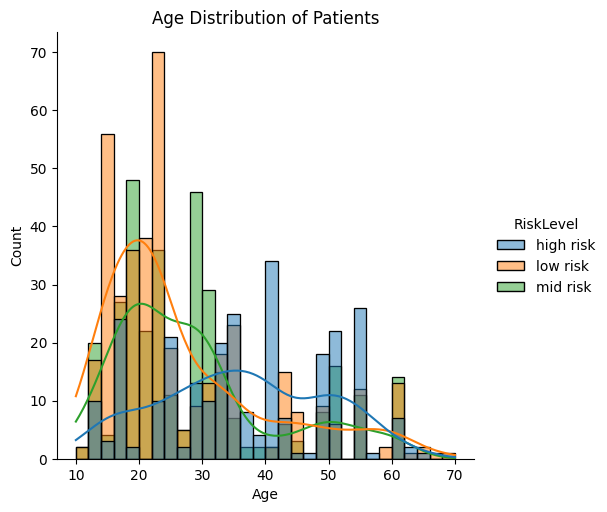

<Figure size 1600x1600 with 0 Axes>

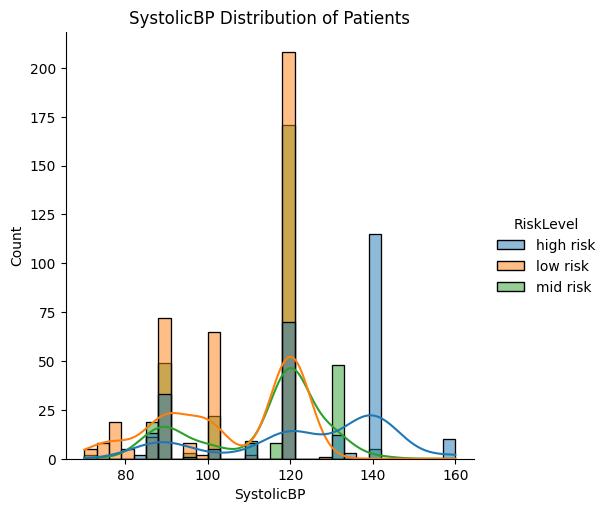

<Figure size 1600x1600 with 0 Axes>

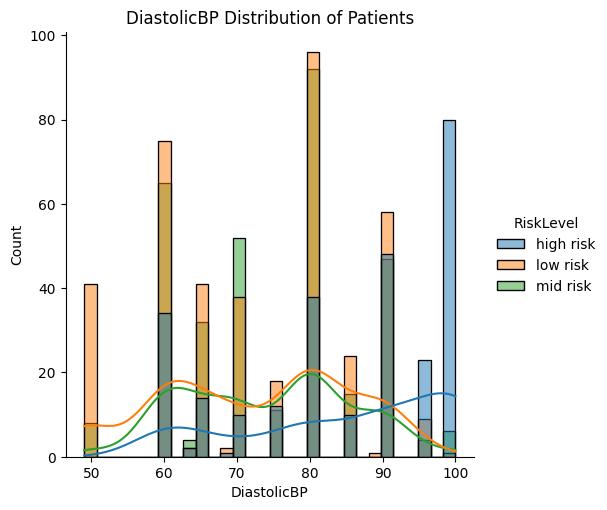

<Figure size 1600x1600 with 0 Axes>

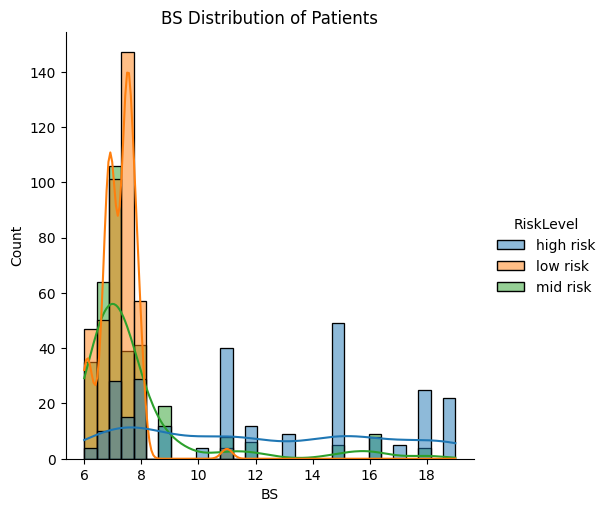

<Figure size 1600x1600 with 0 Axes>

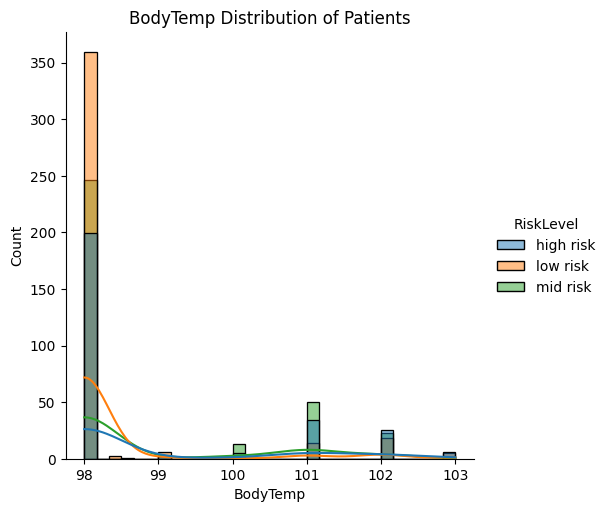

<Figure size 1600x1600 with 0 Axes>

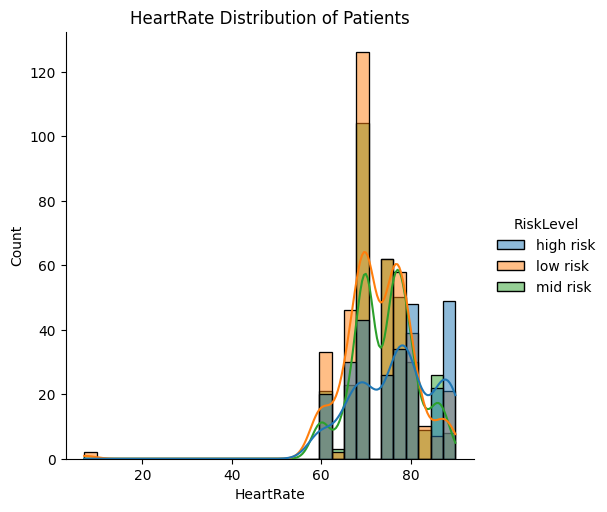

In [25]:
columns = df.columns[:len(df.columns) - 1]
for column in columns:
    plt.figure(figsize=(8,8), dpi=200)
    sns.displot(data=df, x=str(column), kde=True, hue="RiskLevel", bins=30).set(title="{} Distribution of Patients".format(str(column)))
    plt.show()

[Text(0.5, 1.0, 'Number Of Patients In Each Risk Category')]

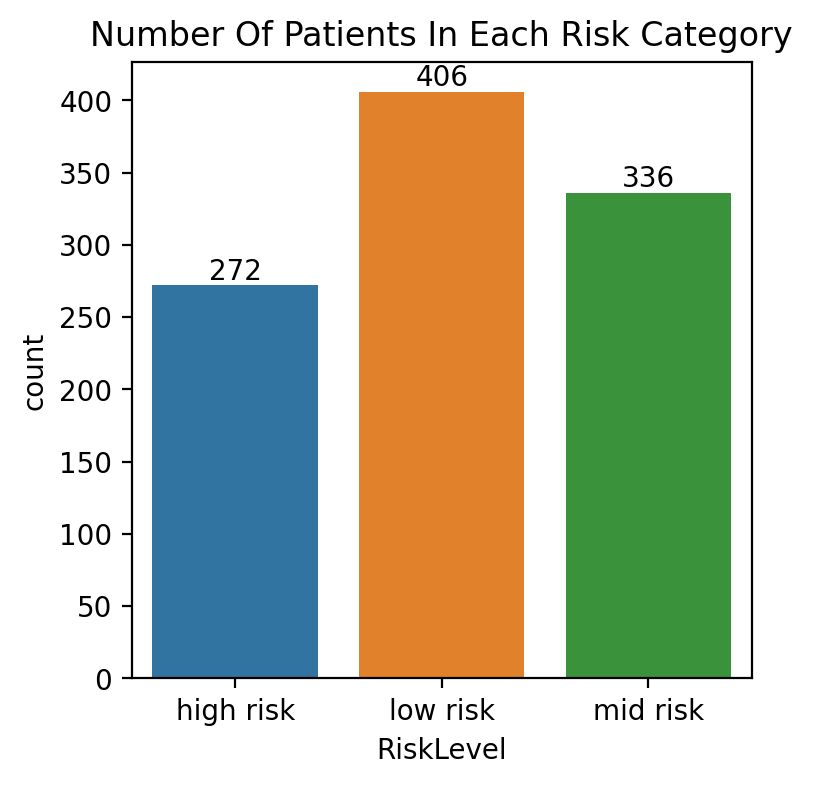

In [73]:
plt.figure(figsize=(4,4), dpi=200)
ax= sns.countplot(data=df, x="RiskLevel")
ax.bar_label(ax.containers[0])
ax.set(title="Number Of Patients In Each Risk Category")

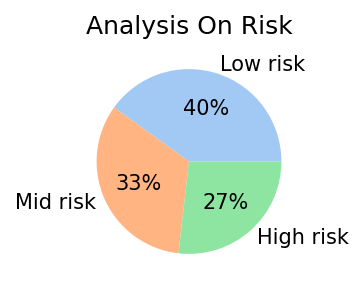

In [27]:
plt.figure(figsize=(2,2), dpi=150)
labels = ['Low risk', 'Mid risk', 'High risk']
low_risk = df[df['RiskLevel'] == 'low risk']
mid_risk = df[df['RiskLevel'] == 'mid risk']
high_risk = df[df['RiskLevel'] == 'high risk']
data = [len(low_risk), len(mid_risk), len(high_risk)]
colors = sns.color_palette('pastel')[0:5]
fig = plt.pie(x=data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Analysis On Risk')
plt.show()

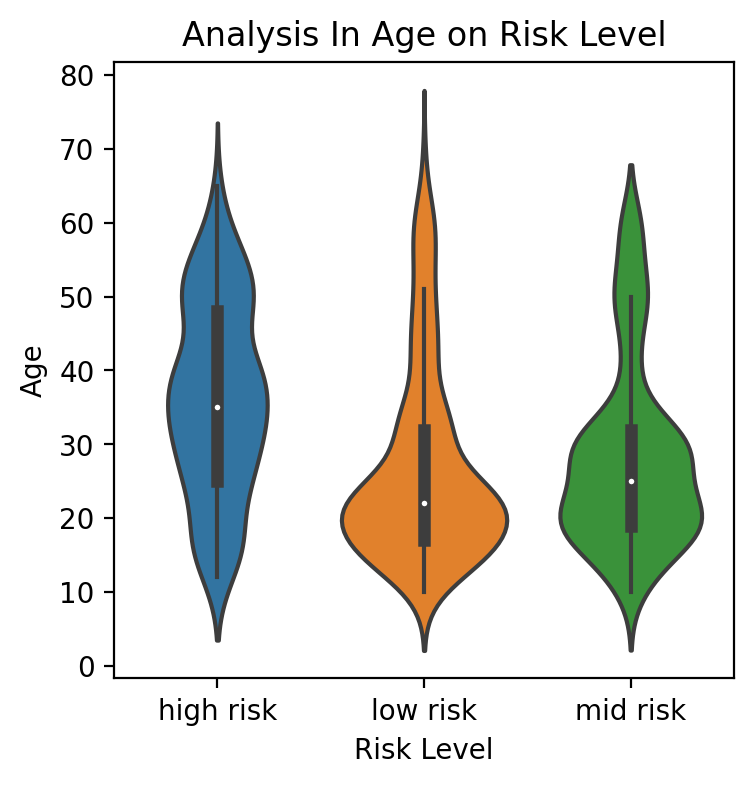

In [83]:
fig = plt.figure(figsize=(4,4), dpi=200)
sns.violinplot(x="RiskLevel", y="Age", data=df).set(title="Analysis In Age on Risk Level", xlabel="Risk Level")
plt.show()

# Correlation Matrix

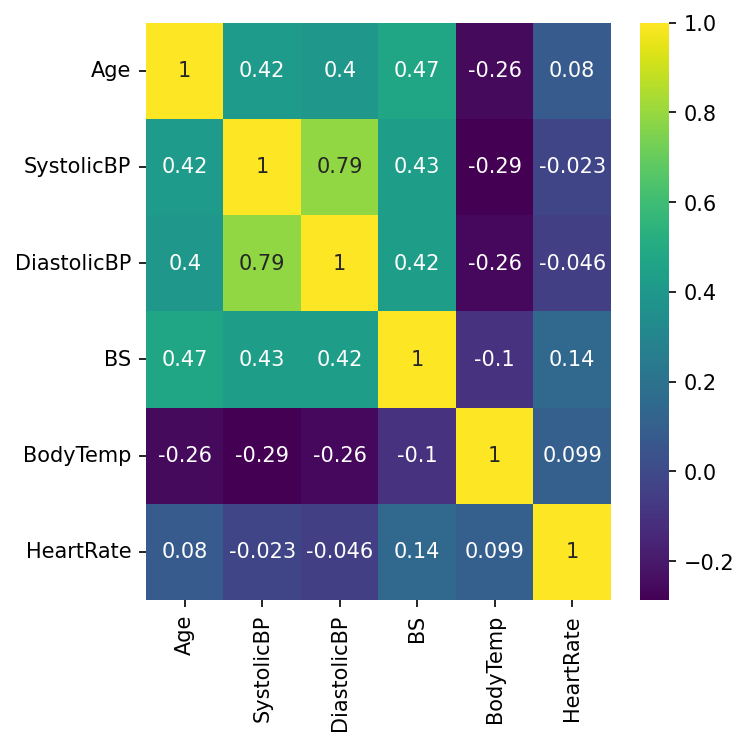

In [82]:
plt.figure(figsize=(5,5), dpi=150)
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

 ## MUTIVARIATE ANALYSIS USING PAIRPLOT

<Figure size 1280x960 with 0 Axes>

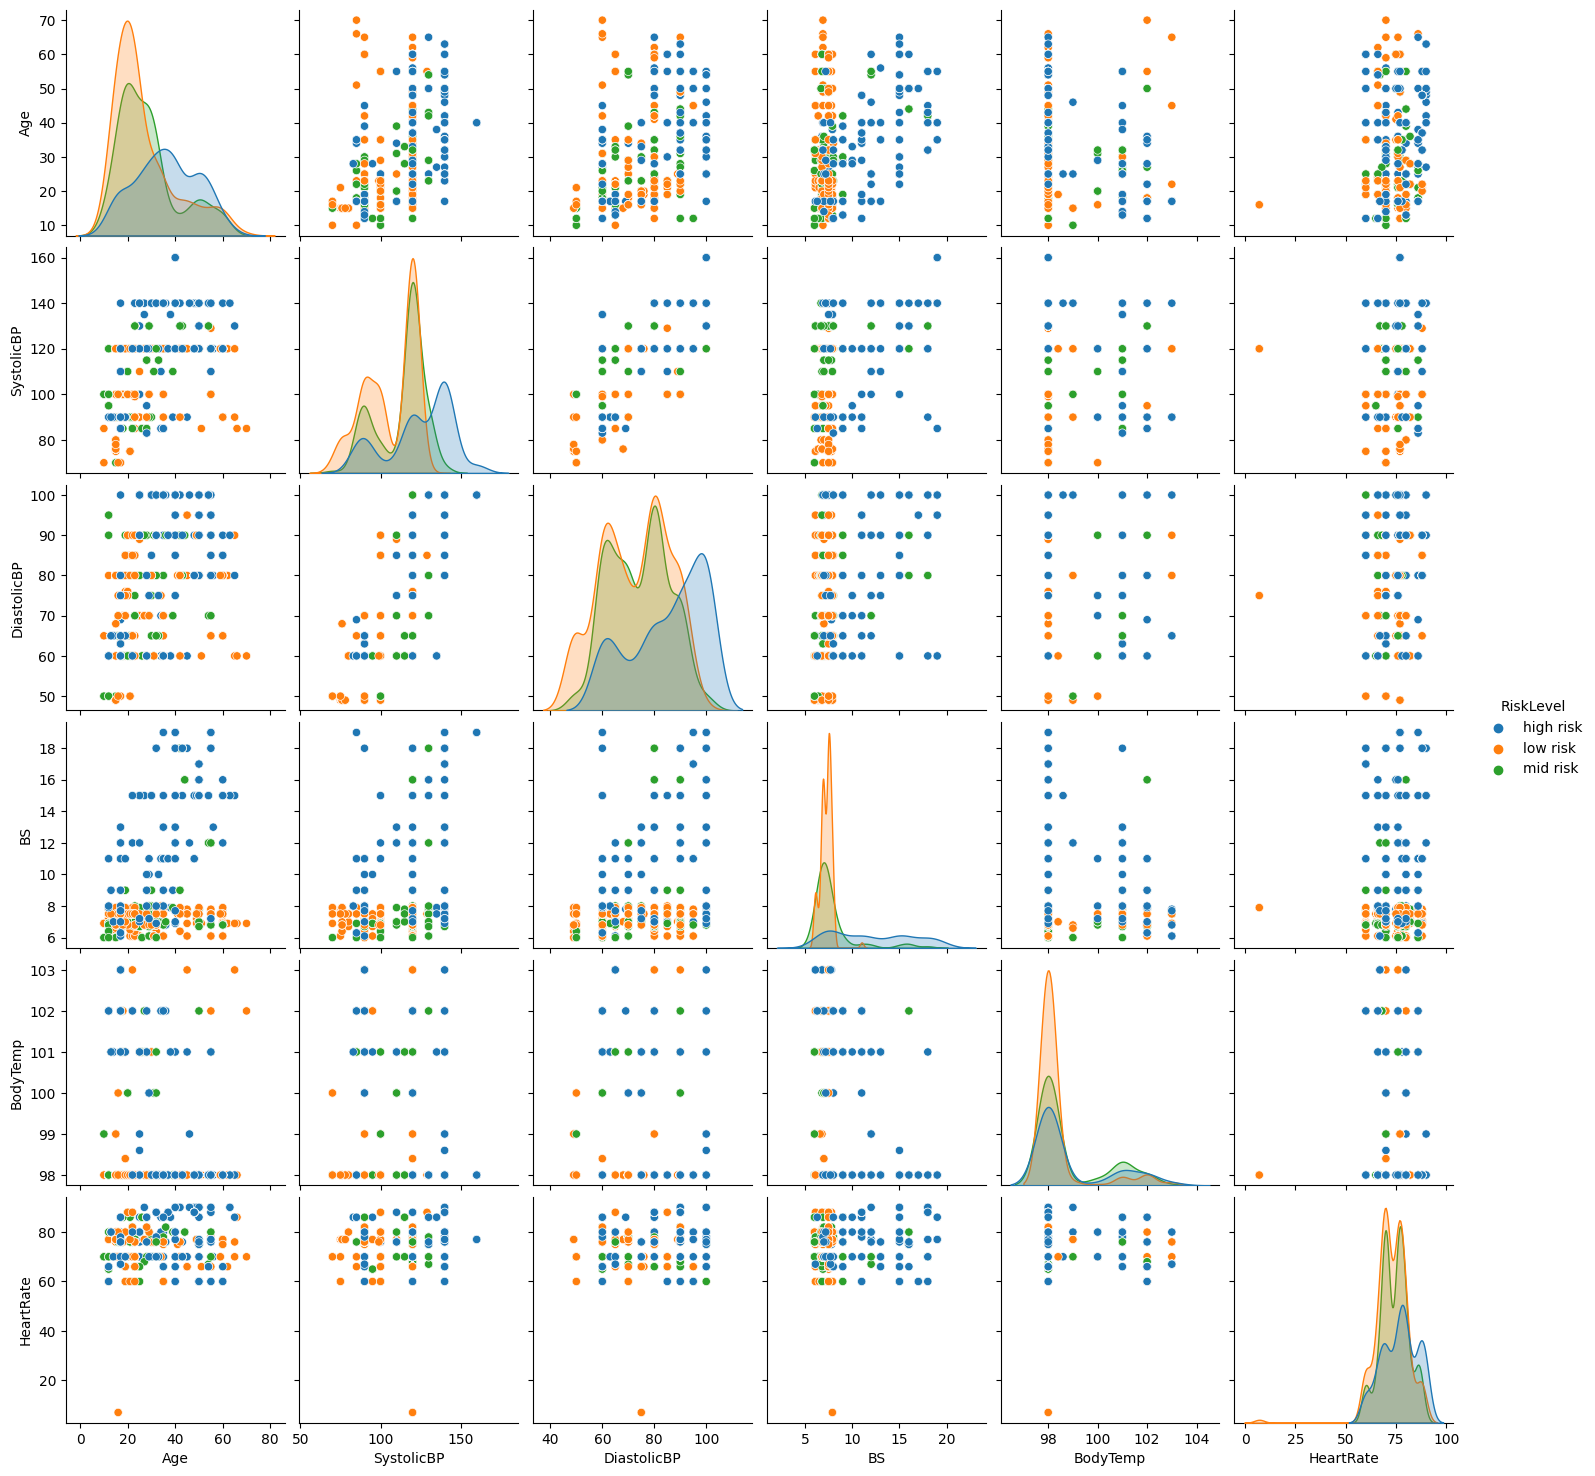

In [78]:
plt.figure(dpi=200)
sns.pairplot(df, hue='RiskLevel')
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [86]:
df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [87]:
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [118]:
X = df.drop(columns=['RiskLevel'],axis=1)
y = df['RiskLevel']

In [119]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [120]:
#X=preprocessor.fit_transform(X)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [122]:
X_train.shape

(709, 6)

In [123]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [124]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()


models= [log_model,
svc_model,
dtr_model,
rfc_model,
gnb_model,
]

# Define the models evaluation function
def models_evaluation(X_train, y_train, x_test, y_test, model):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    #print(f1_score(y_test, y_pred))
    
  
# Run models_evaluation function
for model in models:
    print(str(model))
    models_evaluation(X_train, y_train, X_test,y_test,model)
    print("\n")

LogisticRegression(max_iter=10000)
              precision    recall  f1-score   support

   high risk       0.70      0.78      0.74        76
    low risk       0.61      0.89      0.72       117
    mid risk       0.62      0.28      0.38       112

    accuracy                           0.64       305
   macro avg       0.64      0.65      0.61       305
weighted avg       0.64      0.64      0.60       305



LinearSVC(dual=False)
              precision    recall  f1-score   support

   high risk       0.73      0.75      0.74        76
    low risk       0.59      0.90      0.71       117
    mid risk       0.63      0.28      0.39       112

    accuracy                           0.63       305
   macro avg       0.65      0.64      0.61       305
weighted avg       0.64      0.63      0.60       305



DecisionTreeClassifier()
              precision    recall  f1-score   support

   high risk       0.84      0.91      0.87        76
    low risk       0.84      0.75      0.79